In [2]:
# Import the library
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
from collections import defaultdict
from collections import Counter

In [3]:
# open the file
html_file = open('Resdex.html' , 'r')

In [4]:
# read the file
index = html_file.read()

In [5]:
# creating beautifulsoap 
S = BeautifulSoup(index, 'html.parser')
# S.prettify()

In [6]:
# create empty dictionary
data = {"name" : [], "Salary" : [], "Experience" : [], "Education" : [], "Location" : [], "Preferred_location" : [], "Current_Employer" : [], "Key_Skills" : []}

In [7]:
# print the title of the page
title = S.title 
print(title.string)

Resdex


In [8]:
# Extract names of candidates
names  = S.find_all( "a",{"class" : "link ext candidate-name ellipsis"})
for item in names:
    # print(item.getText().strip())
    data["name"].append(item.getText().strip())
    

In [9]:
# Extract current location of candidates

Location = S.find_all("div",  {"class" : "tuple on"})
len(Location)
# Finding all the span that conatin Current location data 
text =  Location[6].find_all("span")

# Handling the Missing Data
Current_location = [container.find_all('span')[6] for container in Location] 
Current_location = [txt.getText() if txt in S.find_all("span" , {"class" : "location"}) else None for txt in Current_location]
Current_location
# append the data in the dictionary
for text in Current_location:
    data["Location"].append(text)

In [10]:
#  Extract preferred location of the candidates
Preferred_location = S.find_all("span", {"class": "ellipsis"})

for item in Preferred_location:
    # print(item.getText().strip())
# append the data in the dictionary:
    data["Preferred_location"].append(item.getText().strip())

In [11]:
Salary = S.find_all(class_='ico naukri-icon naukri-icon-account_balance_wallet')      

for element in Salary:
    parents = []
    parent = element.parent
    parents.append(parent) 
    parent = parent.parent
    for item in parents:
        i = item.get_text().strip()
            # slicing the value from the third index
        updated_salary = i[3:]
            # append the value in the dicyionary
        data["Salary"].append(updated_salary) 

In [12]:
# extract experience of candidates

Experience = S.find_all(class_ = "ico ico-work naukri-icon naukri-icon-work" )
for element in Experience:
    Exp = []
    parent = element.parent
    Exp.append(parent)
    parent = parent.parent
    # print(parents)    
    for item in Exp:
        item.getText()
        # append it to a  dictionary
        data["Experience"].append(item.get_text().strip()) 

In [13]:
# print the Education of the candidates

Education = S.find_all("span", {"id": "education"})
edu = []
for item in Education:
    edu.append(item.getText().strip())
edu.insert(20, None)

for i in edu:
    # append it to a  dictionary
    data["Education"].append(i) 




In [14]:
# Print Current Employer of the candidates

Current_Emp = S.find_all("div",  {"class" : "tuple on"})
len(Current_Emp)
# Finding all the span that conatin Current Employer data from the containers
text =  Current_Emp[7].find_all("span")

# Handling the Missing Data
Current_Employer = [container.find_all('span')[7] for container in Current_Emp]
Current_Employer = [num.getText() if num in S.find_all("span" , {"id" : "currentEmp"}) else None for num in Current_Employer]

for text in Current_Employer:
    data["Current_Employer"].append(text) 

In [15]:
# print the skills of the candidates
Keyskills = S.find_all("span" , {"class" : "key-skills ellispis"})

for i in Keyskills:
    # print(i.getText().strip())
    
# append it to a  dictionary
    data["Key_Skills"].append(i.getText().strip())

In [16]:
# create a dataframe from dictionary and save it to a csv file 
df = pd.DataFrame.from_dict(data)
df.to_csv("data.csv", index = False)

Exploratory Data Analysis

In [17]:
# read the data
df = pd.read_csv("data.csv")


In [18]:
# print top 5 rows of the data
# df.head()

In [19]:
# last 5 rows of the data
# df.tail()

In [20]:
# remove 'lac pa' and ' yrs' from salaries and experience column

df['Salary'] = df['Salary'].str.replace('Lacs', '')
df['Experience'] = df['Experience'].str.replace('y', '.')
df['Experience'] = df['Experience'].str.replace('m', '')


In [21]:
# find missing value in the data
df.isnull().any()

name                  False
Salary                False
Experience            False
Education              True
Location               True
Preferred_location    False
Current_Employer       True
Key_Skills            False
dtype: bool

In [22]:
# fill NAN value
df.fillna("Not Available", inplace= True)

In [23]:
# find duplicate value in the data
df.duplicated().any()

False

In [24]:
# total number of rows and columns in the data
df.shape

(158, 8)

In [25]:
# data type of the data
df.dtypes

name                  object
Salary                object
Experience            object
Education             object
Location              object
Preferred_location    object
Current_Employer      object
Key_Skills            object
dtype: object

In [26]:
# change the data type of salary and Experience column

df["Salary"] = df["Salary"].astype(float)

In [27]:
# Clean the data and and change the data type for Experience column
df['Experience'] = df['Experience'].str.replace(' ', '').astype(float)

In [28]:
# print data type of the dataframe
df.dtypes

name                   object
Salary                float64
Experience            float64
Education              object
Location               object
Preferred_location     object
Current_Employer       object
Key_Skills             object
dtype: object

In [29]:
df.describe()

,Salary,Experience
count,158.000000,158.000000
mean,6.462658,4.421139
std,1.914352,1.278374
min,2.250000,3.000000
25%,5.000000,3.400000
50%,6.150000,4.100000
75%,8.000000,5.110000
max,10.000000,8.000000


In [30]:
# print column names 
df.columns

Index(['name', 'Salary', 'Experience', 'Education', 'Location',
       'Preferred_location', 'Current_Employer', 'Key_Skills'],
      dtype='object')

In [31]:
# print unique number ofvalue 
df.nunique()

name                  158
Salary                 65
Experience             37
Education             155
Location               24
Preferred_location     90
Current_Employer      128
Key_Skills            158
dtype: int64

In [32]:
# print column for a particular name"
# df[df["name"] == "value"]

In [33]:
# print row of a particular index
# df.loc[10]

Data Visualization

In [34]:
# Calculate the total number of entries
df.dtypes

name                   object
Salary                float64
Experience            float64
Education              object
Location               object
Preferred_location     object
Current_Employer       object
Key_Skills             object
dtype: object

In [44]:
# check the data type of the columns
df.dtypes

name                   object
Salary                float64
Experience            float64
Education              object
Location               object
Preferred_location     object
Current_Employer       object
Key_Skills             object
dtype: object

In [37]:
# Function to group salary
def group_candidates_by_Experience(salary):
    Experience_groups = defaultdict(int)  # Initialize a defaultdict to count experience groups

    for i in df["Experience"]:
        # Determine the Experience group (e.g., 100-109 -> 100)
        group = int(i // 1)
        group_range = f"{group}-{group + 1}"  # Create the range string (e.g., "0-9")
        Experience_groups[group_range] += 1
    

    # Convert the defaultdict to a list of tuples and sort it
    sorted_groups = sorted(Experience_groups.items(), key=lambda x: x[0], reverse=True)

    return sorted_groups

# Get the grouped patient counts
Experience = group_candidates_by_Experience(df["Experience"])

# Display the results
for Experience_range, total_Experience in Experience:
    print(f"{Experience_range} : {total_Experience}")

8-9 : 4
7-8 : 7
6-7 : 9
5-6 : 32
4-5 : 39
3-4 : 67


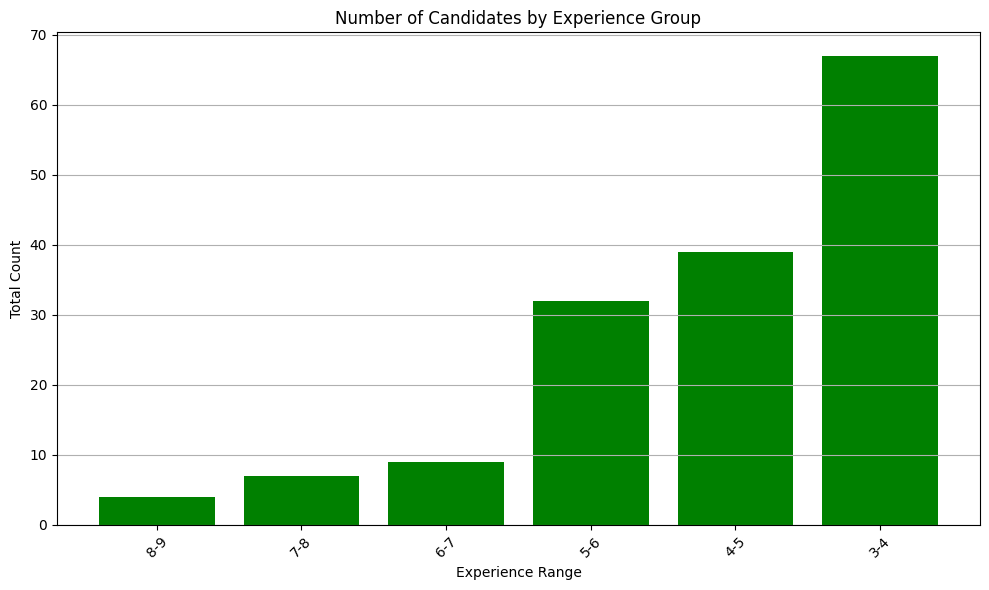

In [38]:
# plot a graph for Experience Range

Exp_ranges = [s[0] for s in Experience]
total_counts = [s[1] for s in Experience]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(Exp_ranges, total_counts, color='Green')
plt.title('Number of Candidates by Experience Group')
plt.xlabel('Experience Range')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()

In [39]:
# Function to group salary
def group_candidates_by_salary(salary):
    salary_groups = defaultdict(int)

    for i in df["Salary"]:
        # Determine the weight group (e.g., 100-109 -> 100)
        group = int(i // 1)
        group_range = f"{group}-{group + 1}"  # Create the range string (e.g., "0-9")
        salary_groups[group_range] += 1
    
    # Convert the defaultdict to a list of tuples and sort it
    sorted_groups = sorted(salary_groups.items(), key=lambda x: x[0], reverse=True)

    return sorted_groups

# Get the grouped patient counts
Salaries = group_candidates_by_salary(df["Salary"])

# Display the results
for salary_range, total_salary in Salaries:
    print(f"{salary_range} : {total_salary}")
 

9-10 : 17
8-9 : 20
7-8 : 20
6-7 : 26
5-6 : 37
4-5 : 18
3-4 : 11
2-3 : 2
10-11 : 7


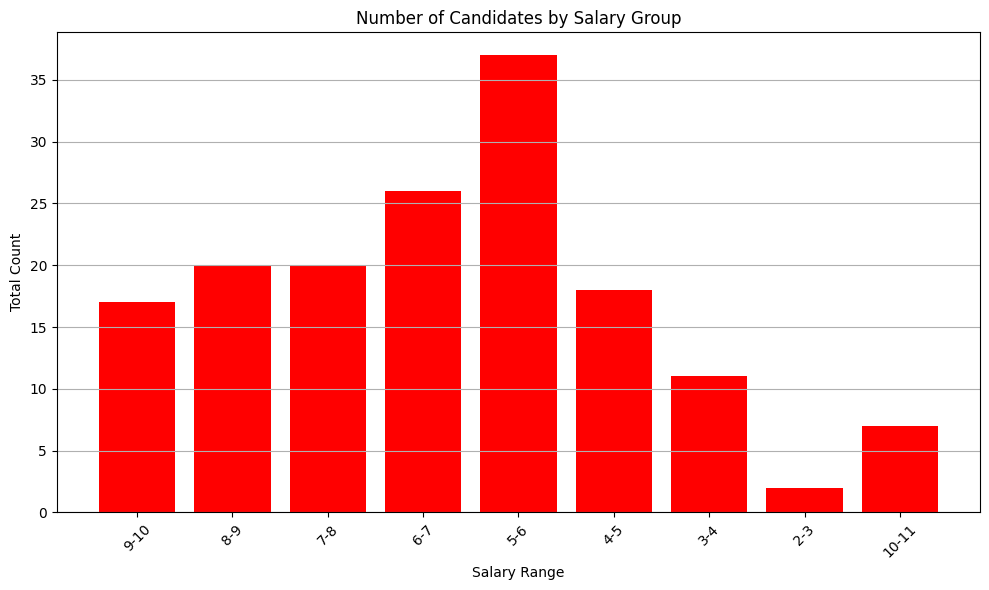

In [40]:
# Plot a graph for Salary Range
salary_ranges = [s[0] for s in Salaries]
total_counts = [s[1] for s in Salaries]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(salary_ranges, total_counts, color='Red')
plt.title('Number of Candidates by Salary Group')
plt.xlabel('Salary Range')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()

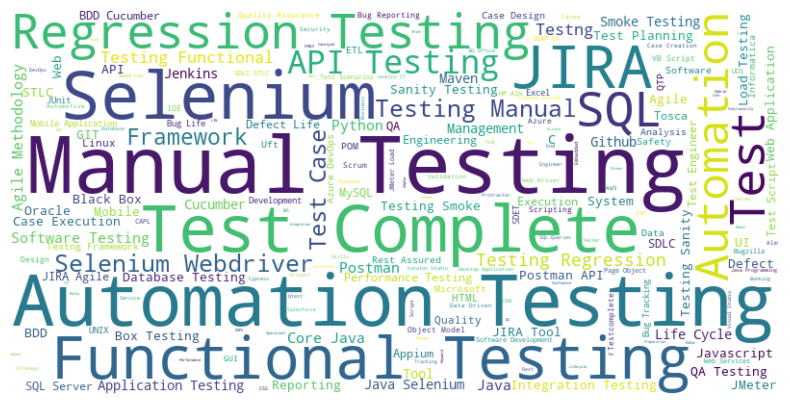

In [41]:
# Print distinct values in the 'Category' column
distinct_skill = df['Key_Skills'].unique()
skills_string = ', '.join(df['Key_Skills'])

# plot a graph for all the skills
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_string)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()

In [42]:
# Count occurrences of each skill
skills_count = Counter('|'.join(df['Key_Skills']).split('|'))

# Convert to Series and get top 20 skills
top_skills = pd.Series(skills_count).sort_values(ascending=False)[:20]

# Plotting using Plotly Express
fig = px.bar(x=top_skills.index, 
             y=top_skills.values, 
             title="Top Candidate Skills",
             labels={'x': 'Skill', 'y': 'Count'},
             color=top_skills.values,
             color_continuous_scale=px.colors.sequential.OrRd)

# Show the plot
fig.update_layout(xaxis_title="Skill", yaxis_title="Count", xaxis_tickangle=-30)
fig.show()

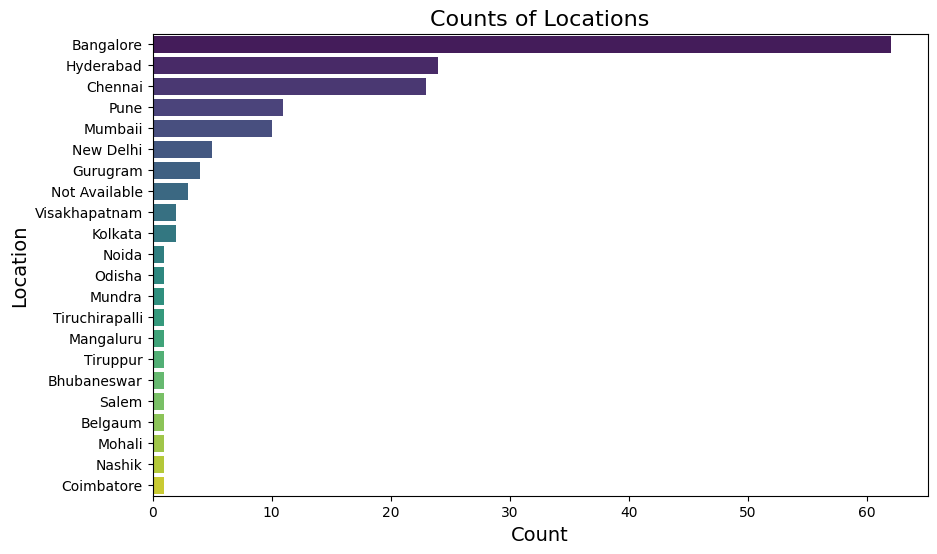

In [43]:
new_location=df['Location'].value_counts()
new_location['Bangalore'] = new_location['Bengaluru'] + new_location['Bengaluru, Karnataka'] 
new_location['Mumbaii'] = new_location['Mumbai'] + new_location['Navi Mumbai']
new_location.drop(['Bengaluru', 'Bengaluru, Karnataka', 'Navi Mumbai', "Mumbai"], inplace=True)
# sort the value in Descending order
new_location.sort_values(ascending = False, inplace=True)

#  Reset the index to prepare for plotting
new_location = new_location.reset_index()
new_location.columns = ['Location', 'Count']  # Rename columns for clarity

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Location', data=new_location, palette='viridis')
# Adding titles and labels
plt.title('Counts of Locations', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Location', fontsize=14)

# Show the plot
plt.show()

Below are the findings from above analysis:
1. Maximum candidates having Experience range 3-4 yrs are looking for th job change.
2. Most of the candidates are from Bangalore, Hyderabad and Chennai location.
3. The average salary of the candidates is between 5 LPA-6 LPA
4. Out of 100 % candidates, only 72% candidates are having test Complete as their major skill
